# Alpha diversity

## Setup

In [1]:
#Libraries
library("phyloseq")
library("microbiome")
library("IRdisplay")
library("ggforce")
#Load phyloseq object
load("phyloseq_rarefied.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




## simple plot

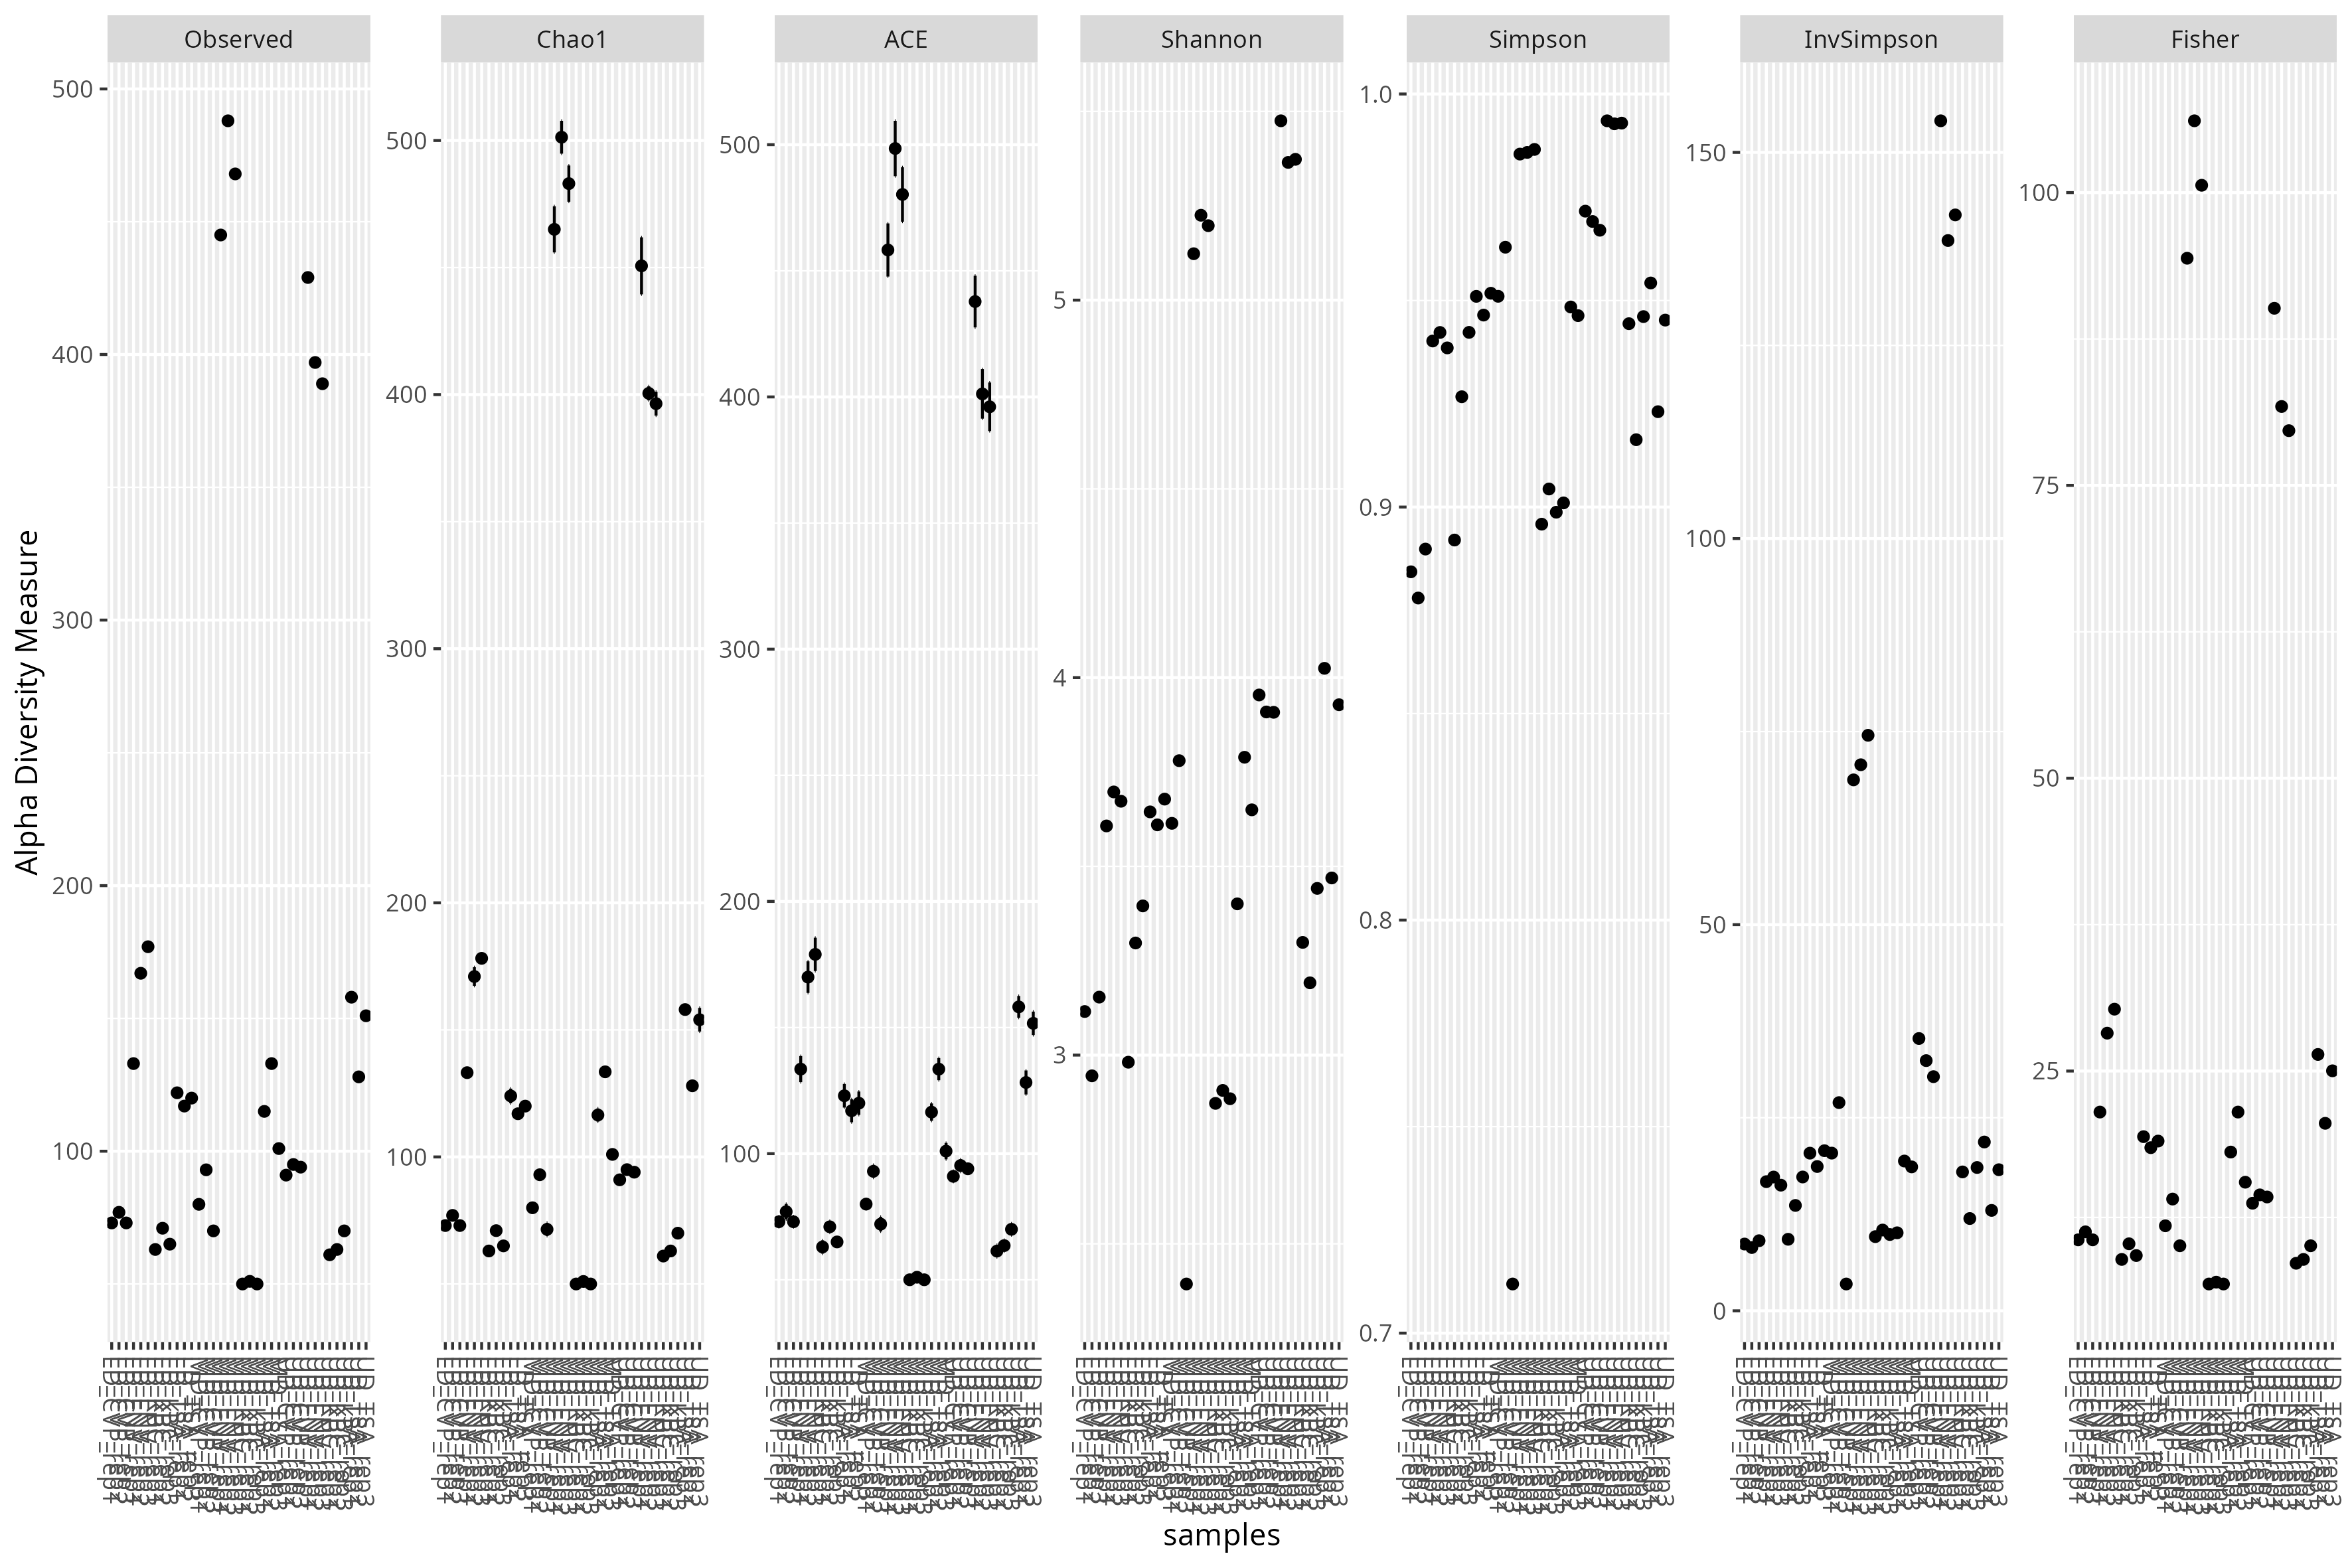

In [2]:
#Simple alpha plot
alpha_plot <- phyloseq::plot_richness(physeq = pseq_rarefy)
#Save ggplot object as png
ggsave(filename = "./alpha_div.png", plot = alpha_plot, 
       device = "png", dpi = 300, units = "mm", height = 200, width = 300)
#Display the plot in jupyter notebook
IRdisplay::display_png(file="./alpha_div.png")

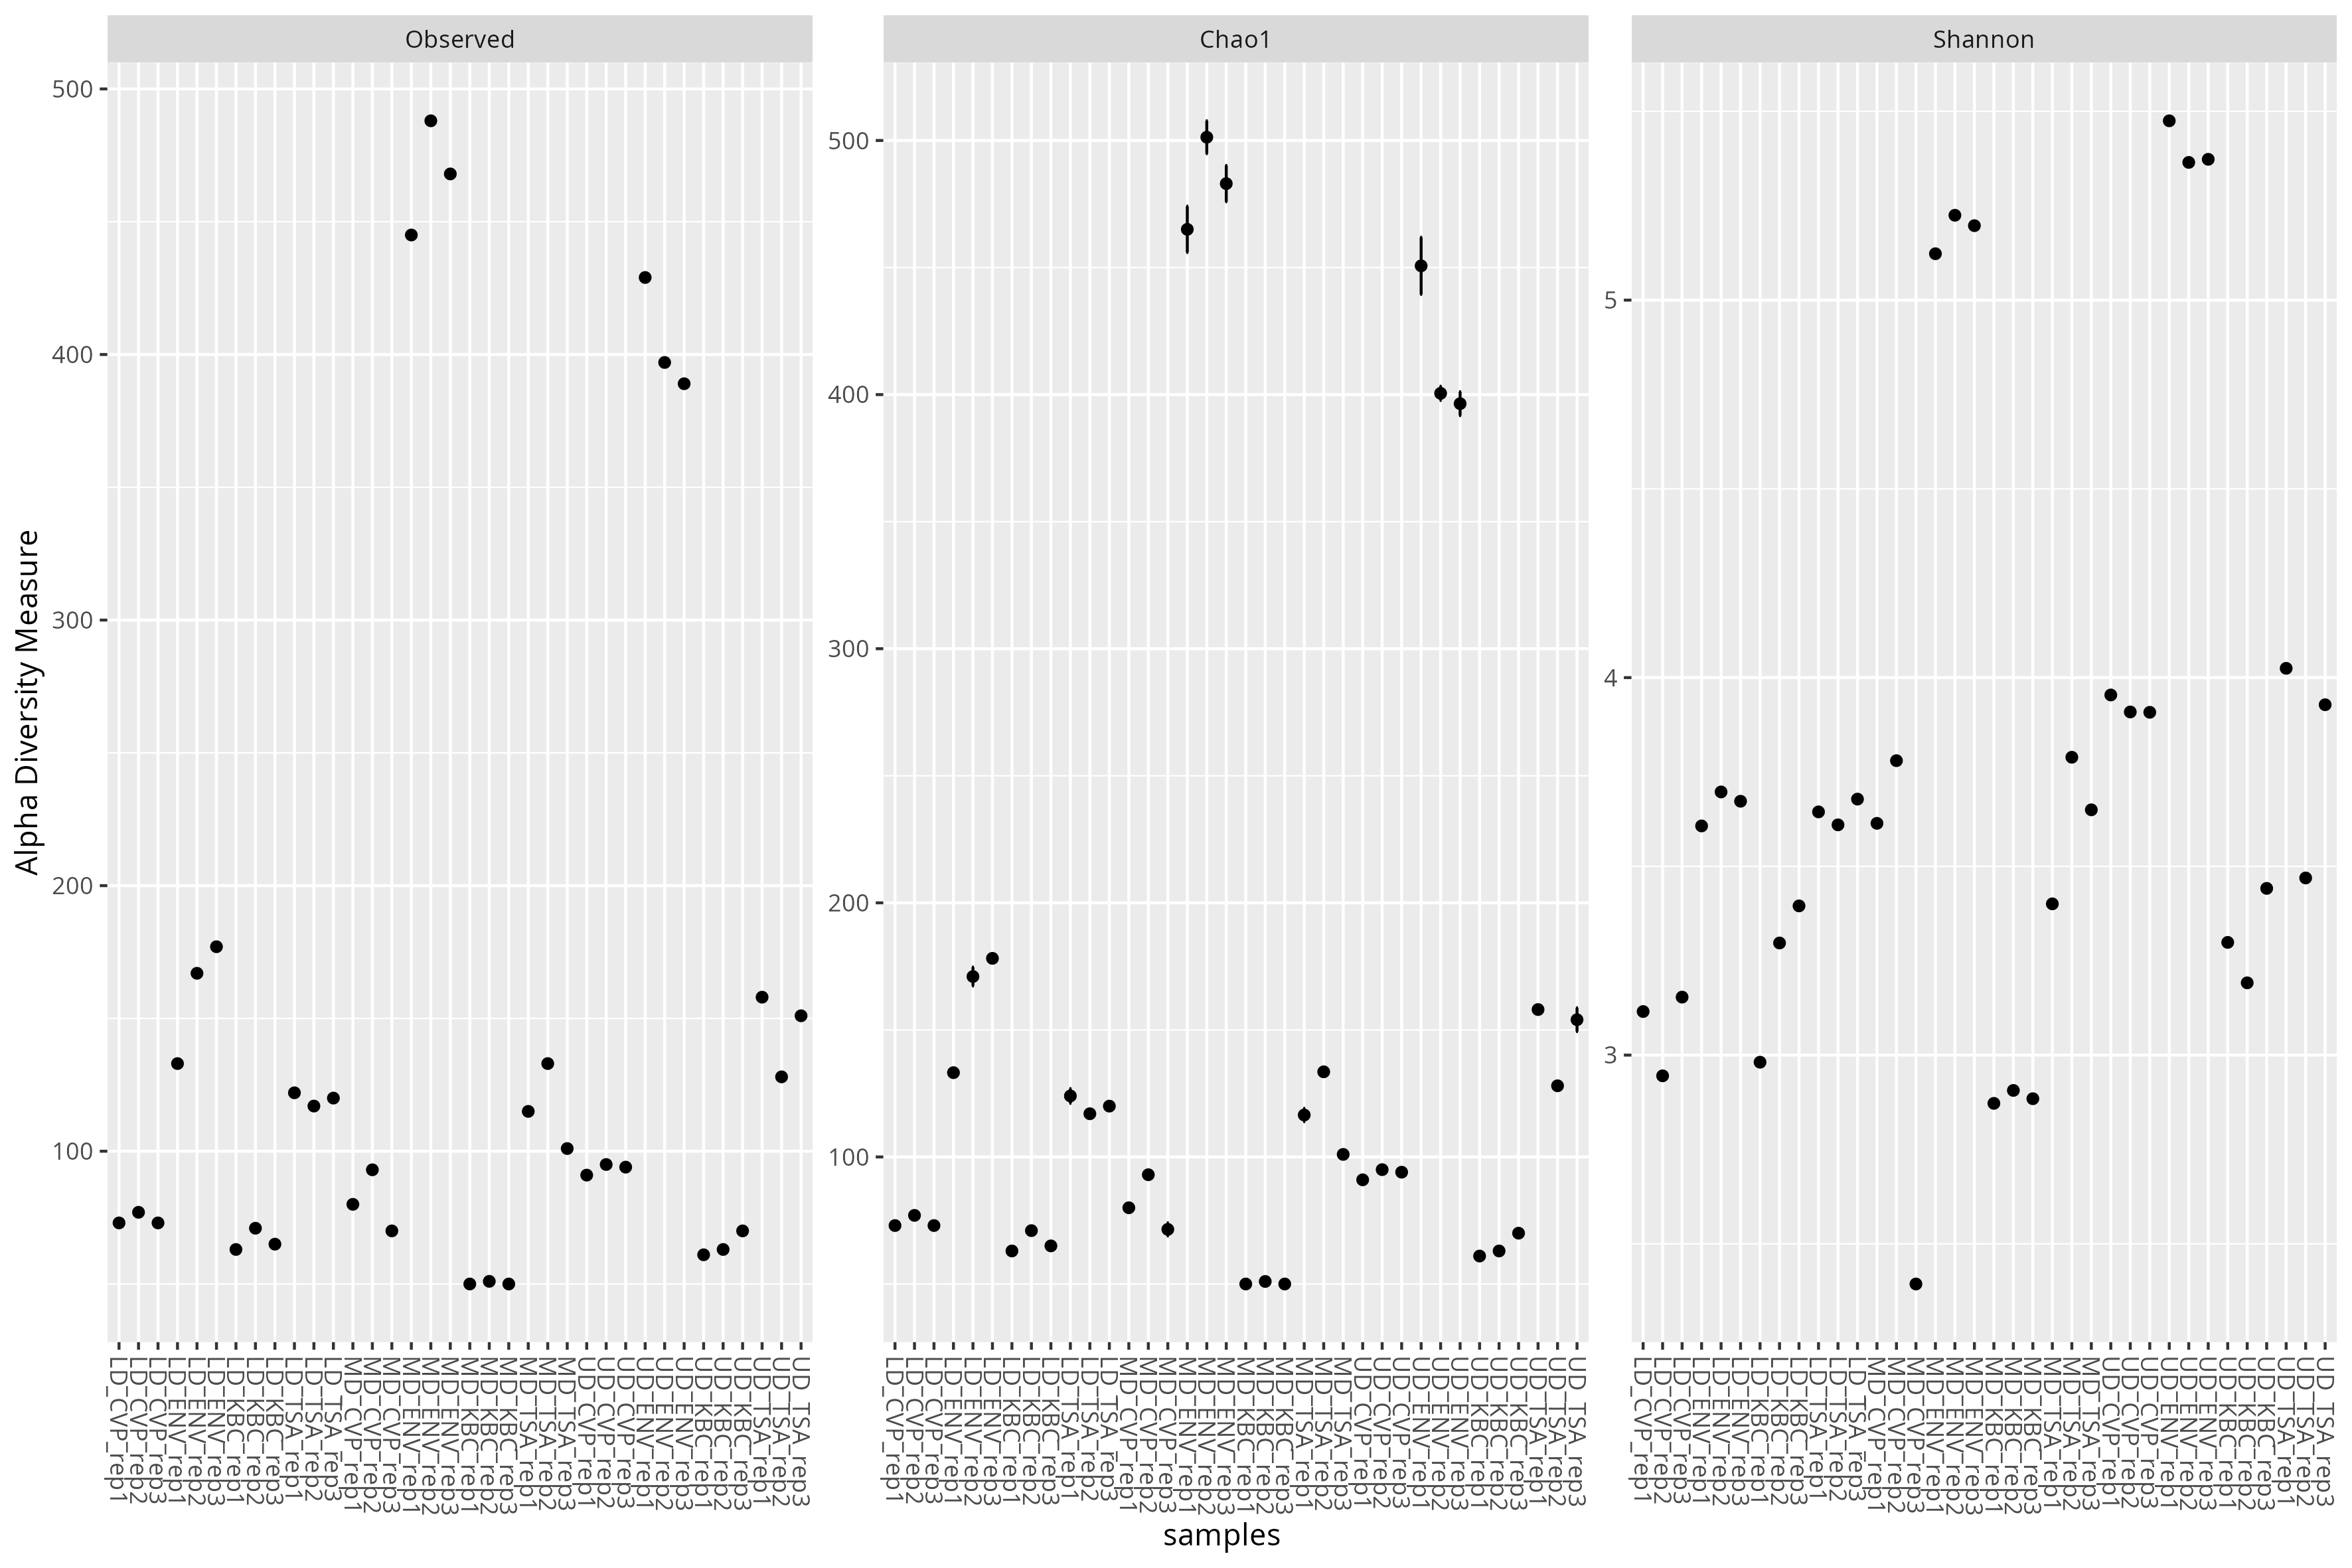

In [3]:
#Simple alpha plot
alpha_plot <- phyloseq::plot_richness(physeq = pseq_rarefy, measures = c("Observed","Chao1","Shannon"))
#Save ggplot object as png
ggsave(filename = "./alpha_div.png", plot = alpha_plot, 
       device = "png", dpi = 300, units = "mm", height = 200, width = 300)
#Display the plot in jupyter notebook
IRdisplay::display_png(file="./alpha_div.png")

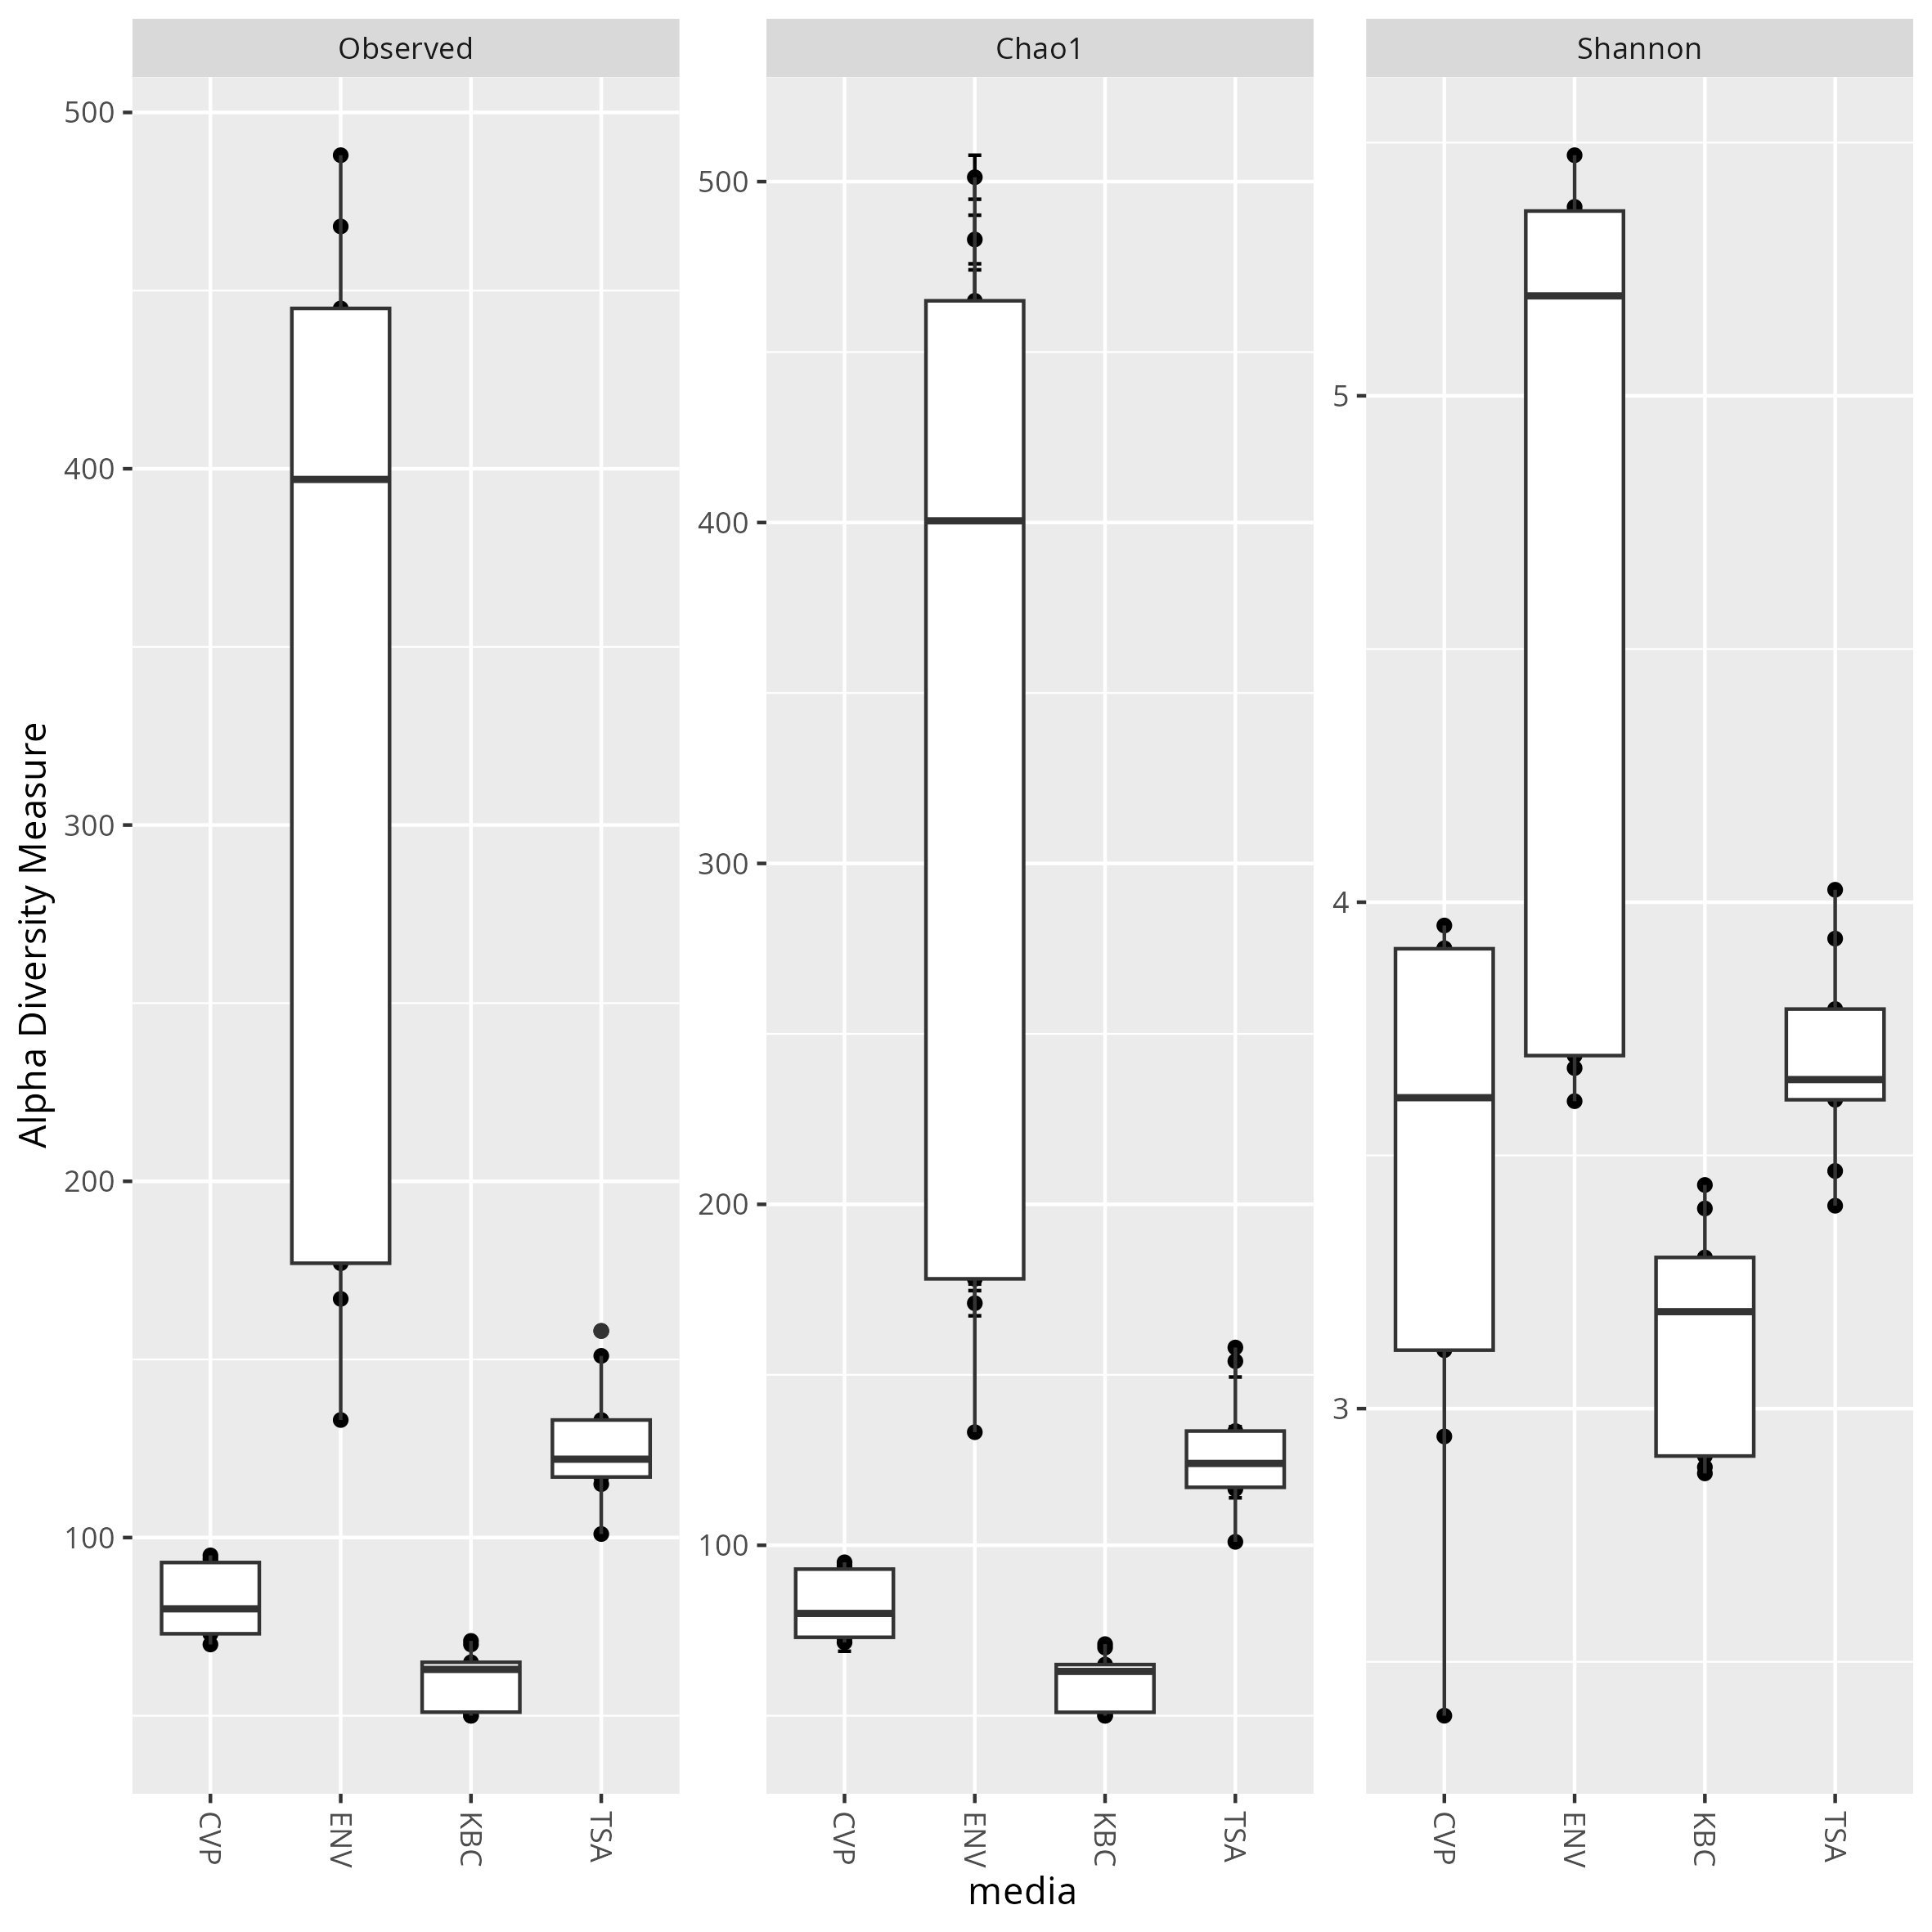

In [4]:
#Box plot
alpha_plot <- phyloseq::plot_richness(physeq = pseq_rarefy,
                        x = "media",
                        measures = c("Observed","Chao1","Shannon")) +
            ggplot2::geom_boxplot()
#Save ggplot object as png
ggsave(filename = "./alpha_div.png", plot = alpha_plot, 
       device = "png", dpi = 300, units = "mm", height = 200, width = 200)
#Display the plot in jupyter notebook
IRdisplay::display_png(file="./alpha_div.png")

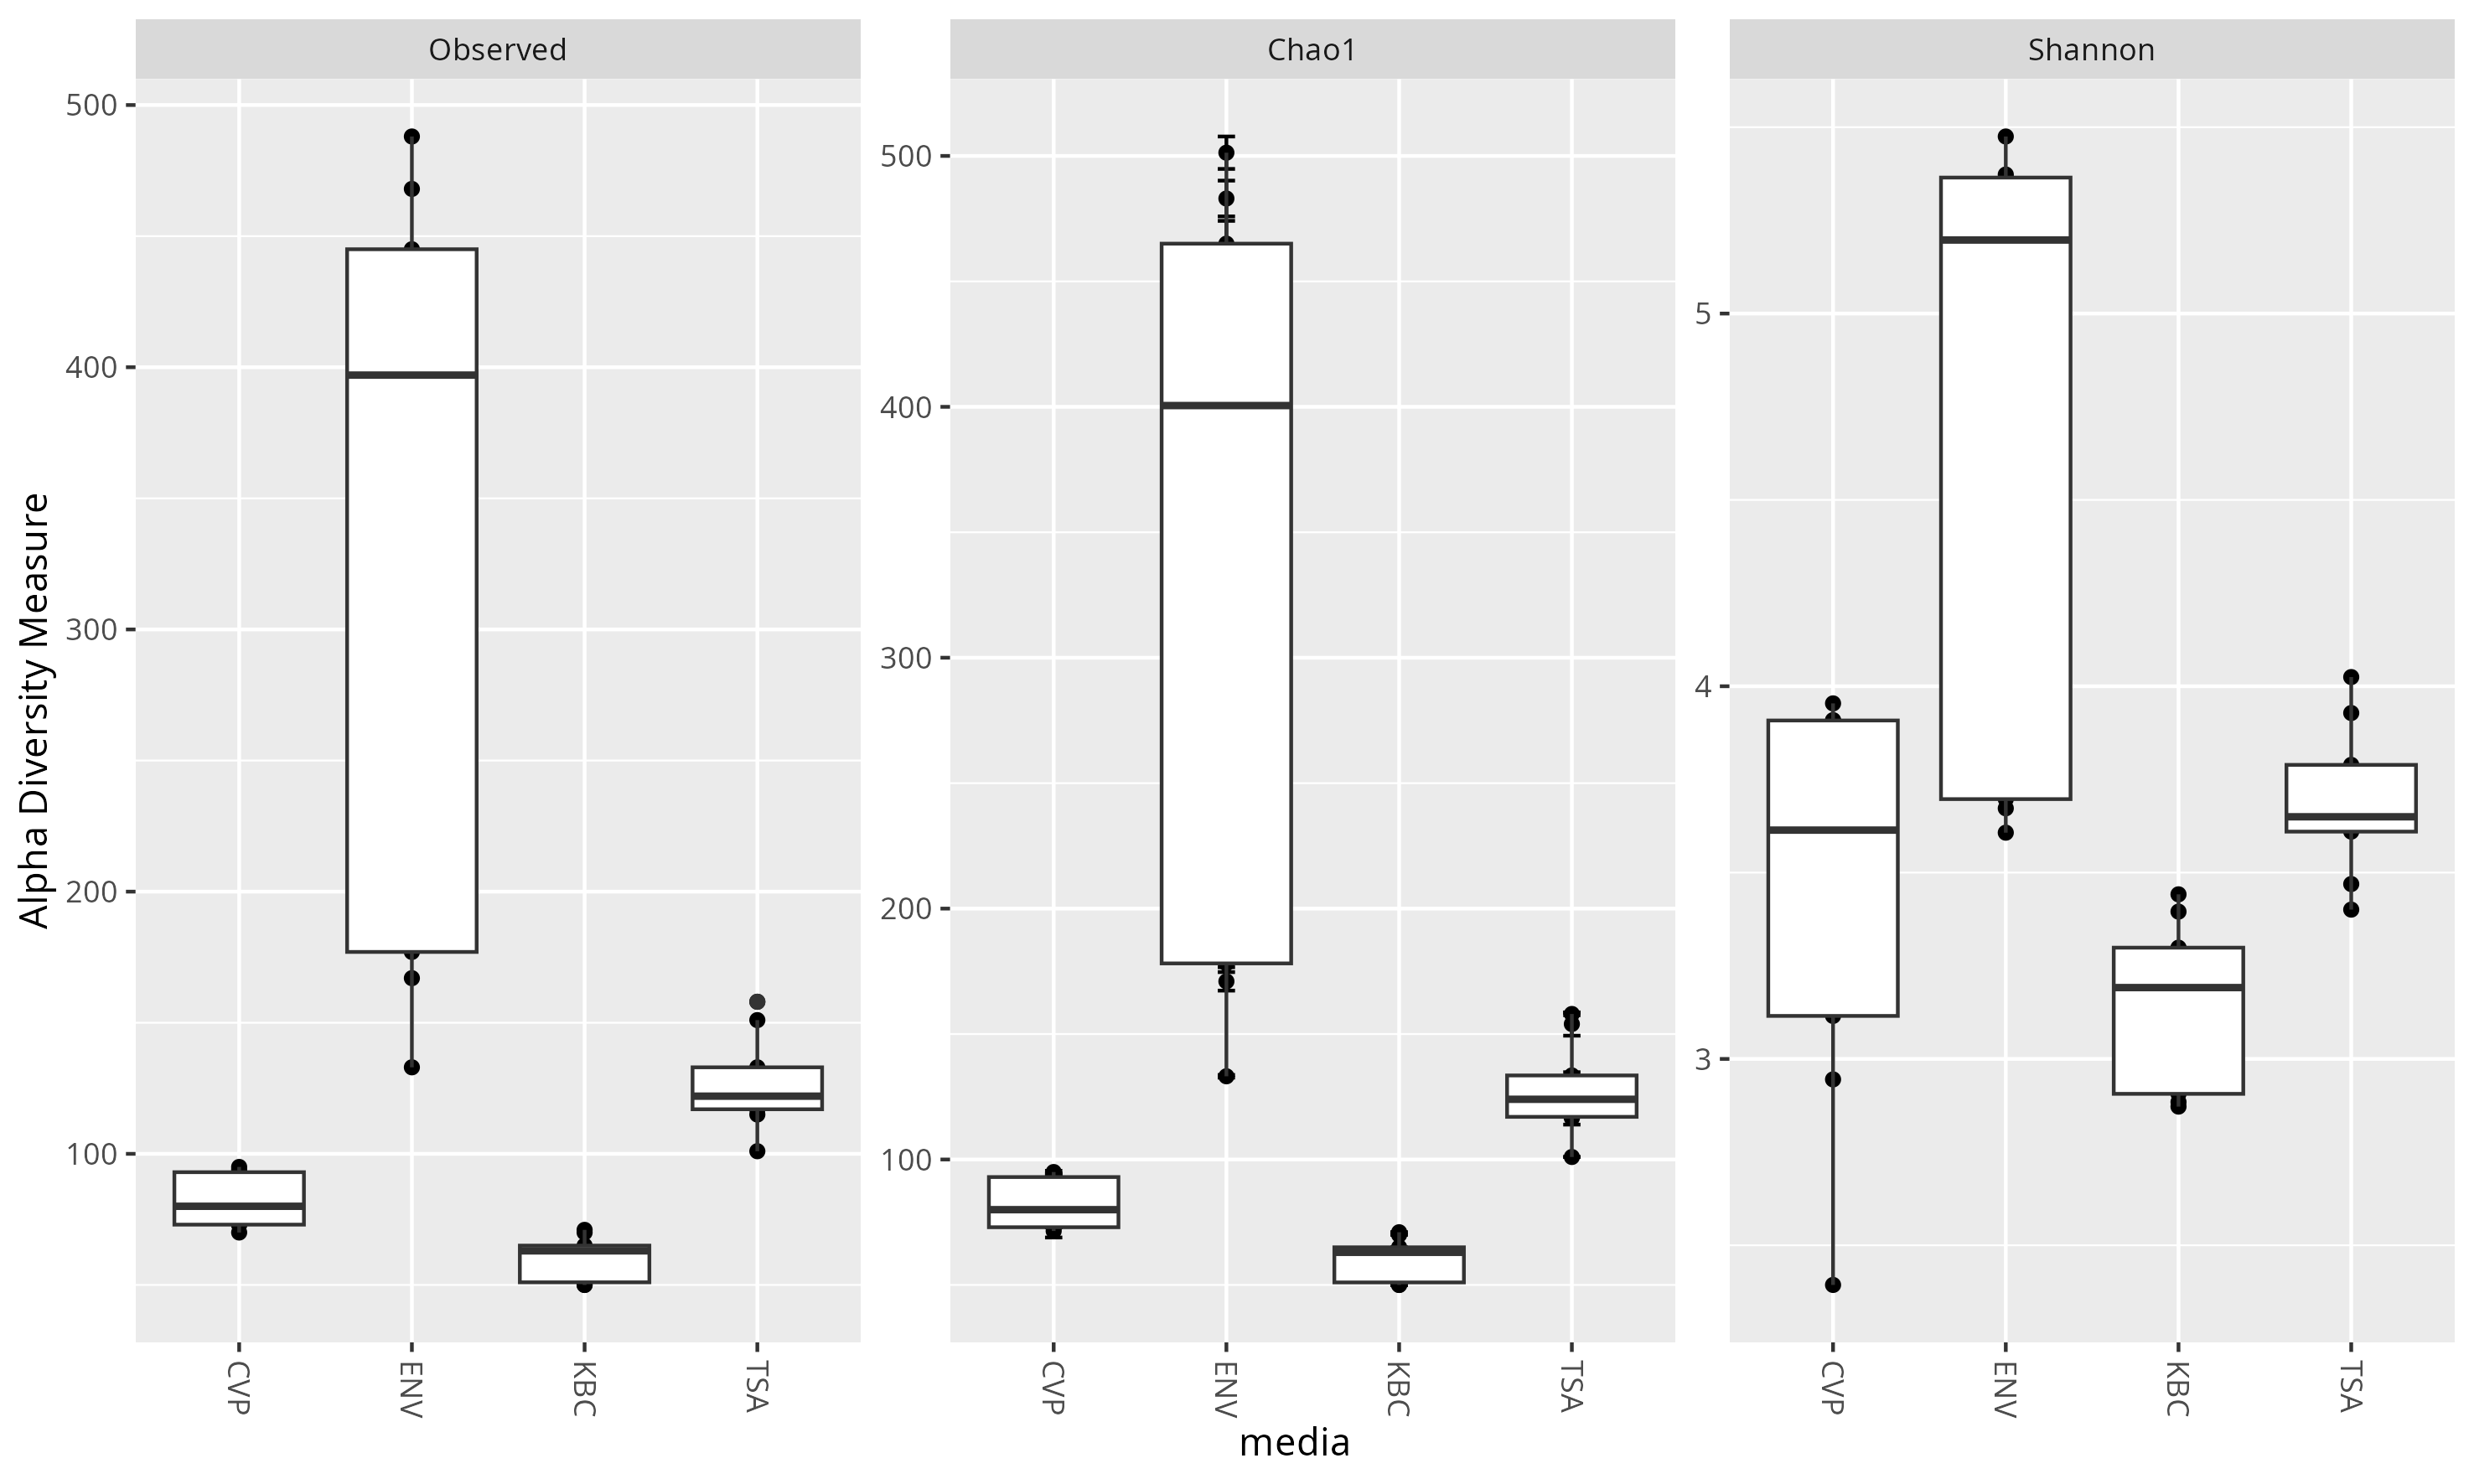

In [5]:
#Produce ggplot object of boxplot
alpha_boxplot <- phyloseq::plot_richness(physeq = pseq_rarefy,
                        x = "media",
                        measures = c("Observed","Chao1","Shannon")) +
                            ggplot2::geom_boxplot()
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_media_boxplot.png", plot = alpha_boxplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_media_boxplot.png")

## Alpha stats

In [6]:
#Produce data frame of all alpha diversity values
alpha_df <- phyloseq::estimate_richness(physeq = pseq_rarefy)
head(alpha_df)

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LD_CVP_rep1,73,73.0000,0.0000000,73.0000,2.158132,3.115408,0.8843204,8.644567,10.58904
LD_CVP_rep2,77,77.0000,0.0000000,77.0000,3.070598,2.945080,0.8779742,8.194989,11.27123
LD_CVP_rep3,73,73.0000,0.0000000,73.0000,2.158132,3.153588,0.8898272,9.076653,10.58904
LD_ENV_rep1,133,133.1667,0.5433606,133.5209,5.178117,3.607089,0.9402007,16.722600,21.49715
LD_ENV_rep2,167,171.0000,3.6881985,169.9805,6.261627,3.697132,0.9422674,17.321235,28.23371
LD_ENV_rep3,177,178.1538,1.5237362,179.0032,6.598923,3.672467,0.9385312,16.268424,30.28189


In [7]:
#Paired wilcoxon test
#Observed
pairwise.wilcox.test(alpha_df$Observed, phyloseq::sample_data(pseq_rarefy)$media)
#Chao1
pairwise.wilcox.test(alpha_df$Chao1, phyloseq::sample_data(pseq_rarefy)$media)
#Shannon
pairwise.wilcox.test(alpha_df$Shannon, phyloseq::sample_data(pseq_rarefy)$media)

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  alpha_df$Observed and phyloseq::sample_data(pseq_rarefy)$media 

    CVP    ENV    KBC   
ENV 0.0024 -      -     
KBC 0.0024 0.0024 -     
TSA 0.0024 0.0024 0.0024

P value adjustment method: holm 

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  alpha_df$Chao1 and phyloseq::sample_data(pseq_rarefy)$media 

    CVP    ENV    KBC   
ENV 0.0020 -      -     
KBC 0.0020 0.0020 -     
TSA 0.0020 0.0017 0.0020

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  alpha_df$Shannon and phyloseq::sample_data(pseq_rarefy)$media 

    CVP     ENV     KBC    
ENV 0.05677 -       -      
KBC 0.38050 0.00025 -      
TSA 0.43628 0.05677 0.00041

P value adjustment method: holm 

## Violoin plot

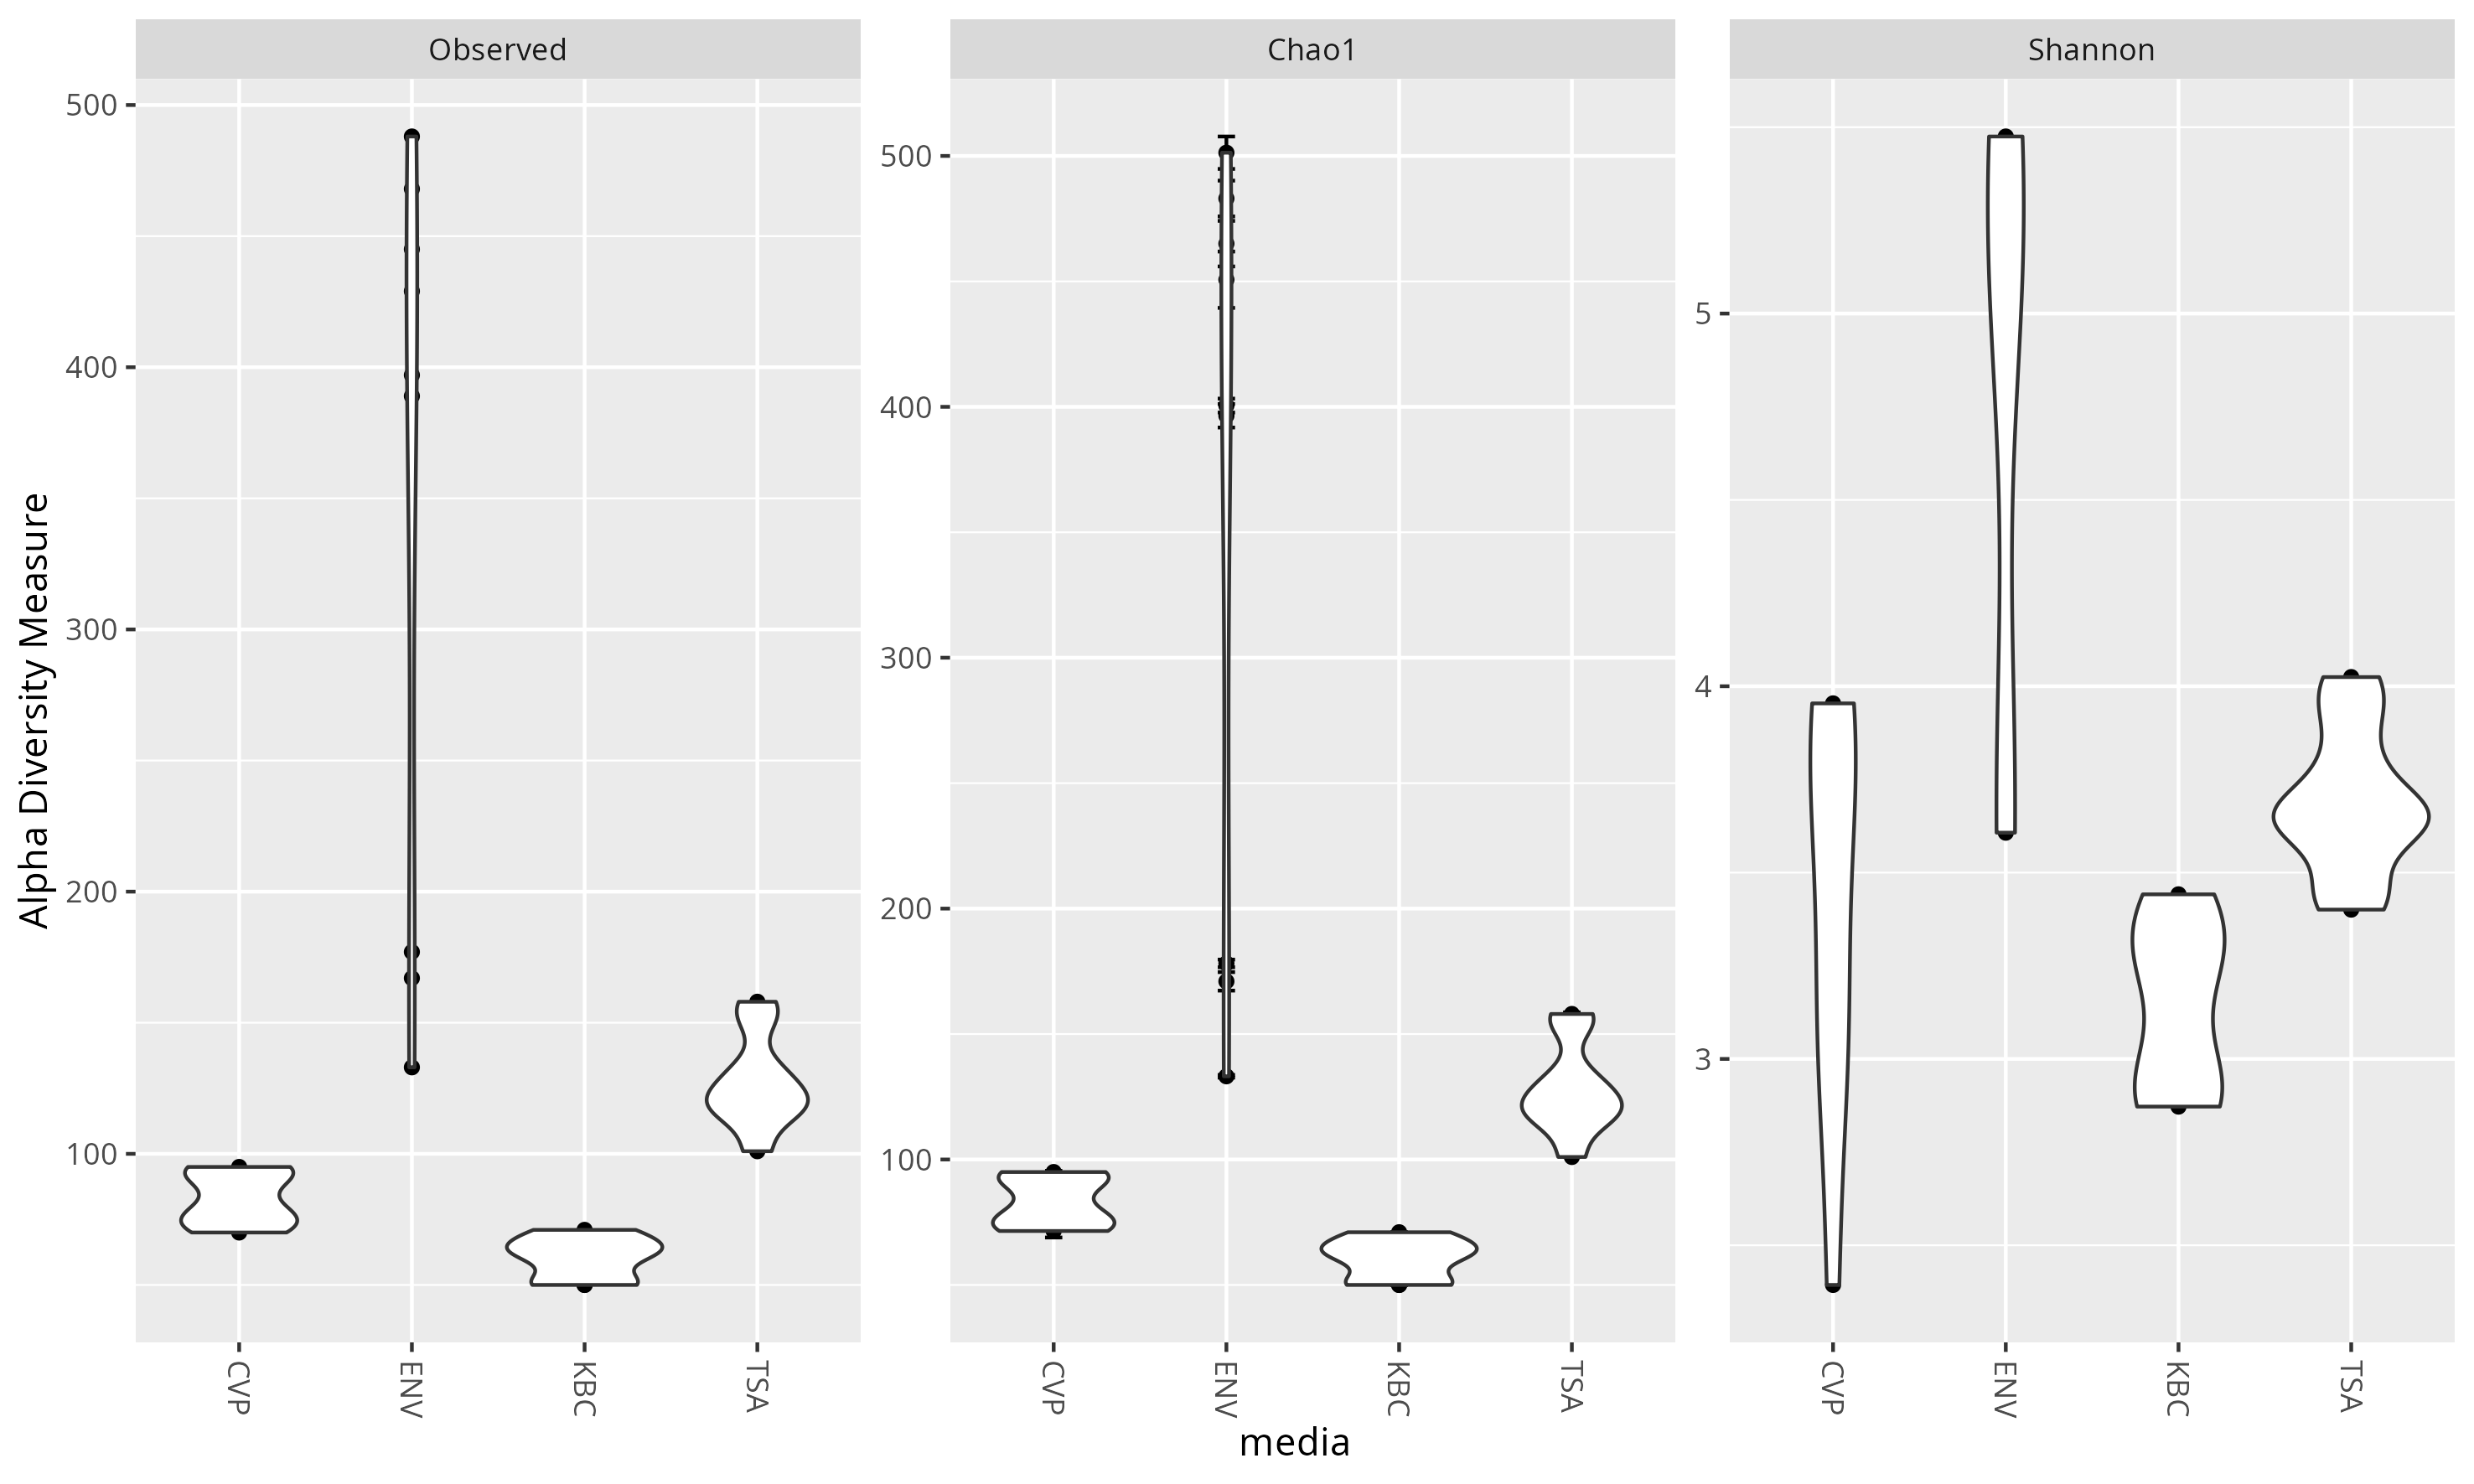

In [8]:
#Produce ggplot object of violin plot
alpha_violinplot <- phyloseq::plot_richness(physeq = pseq_rarefy,
                        x = "media",
                        measures = c("Observed","Chao1","Shannon")) +
                            ggplot2::geom_violin()
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_media_violinplot.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_media_violinplot.png")

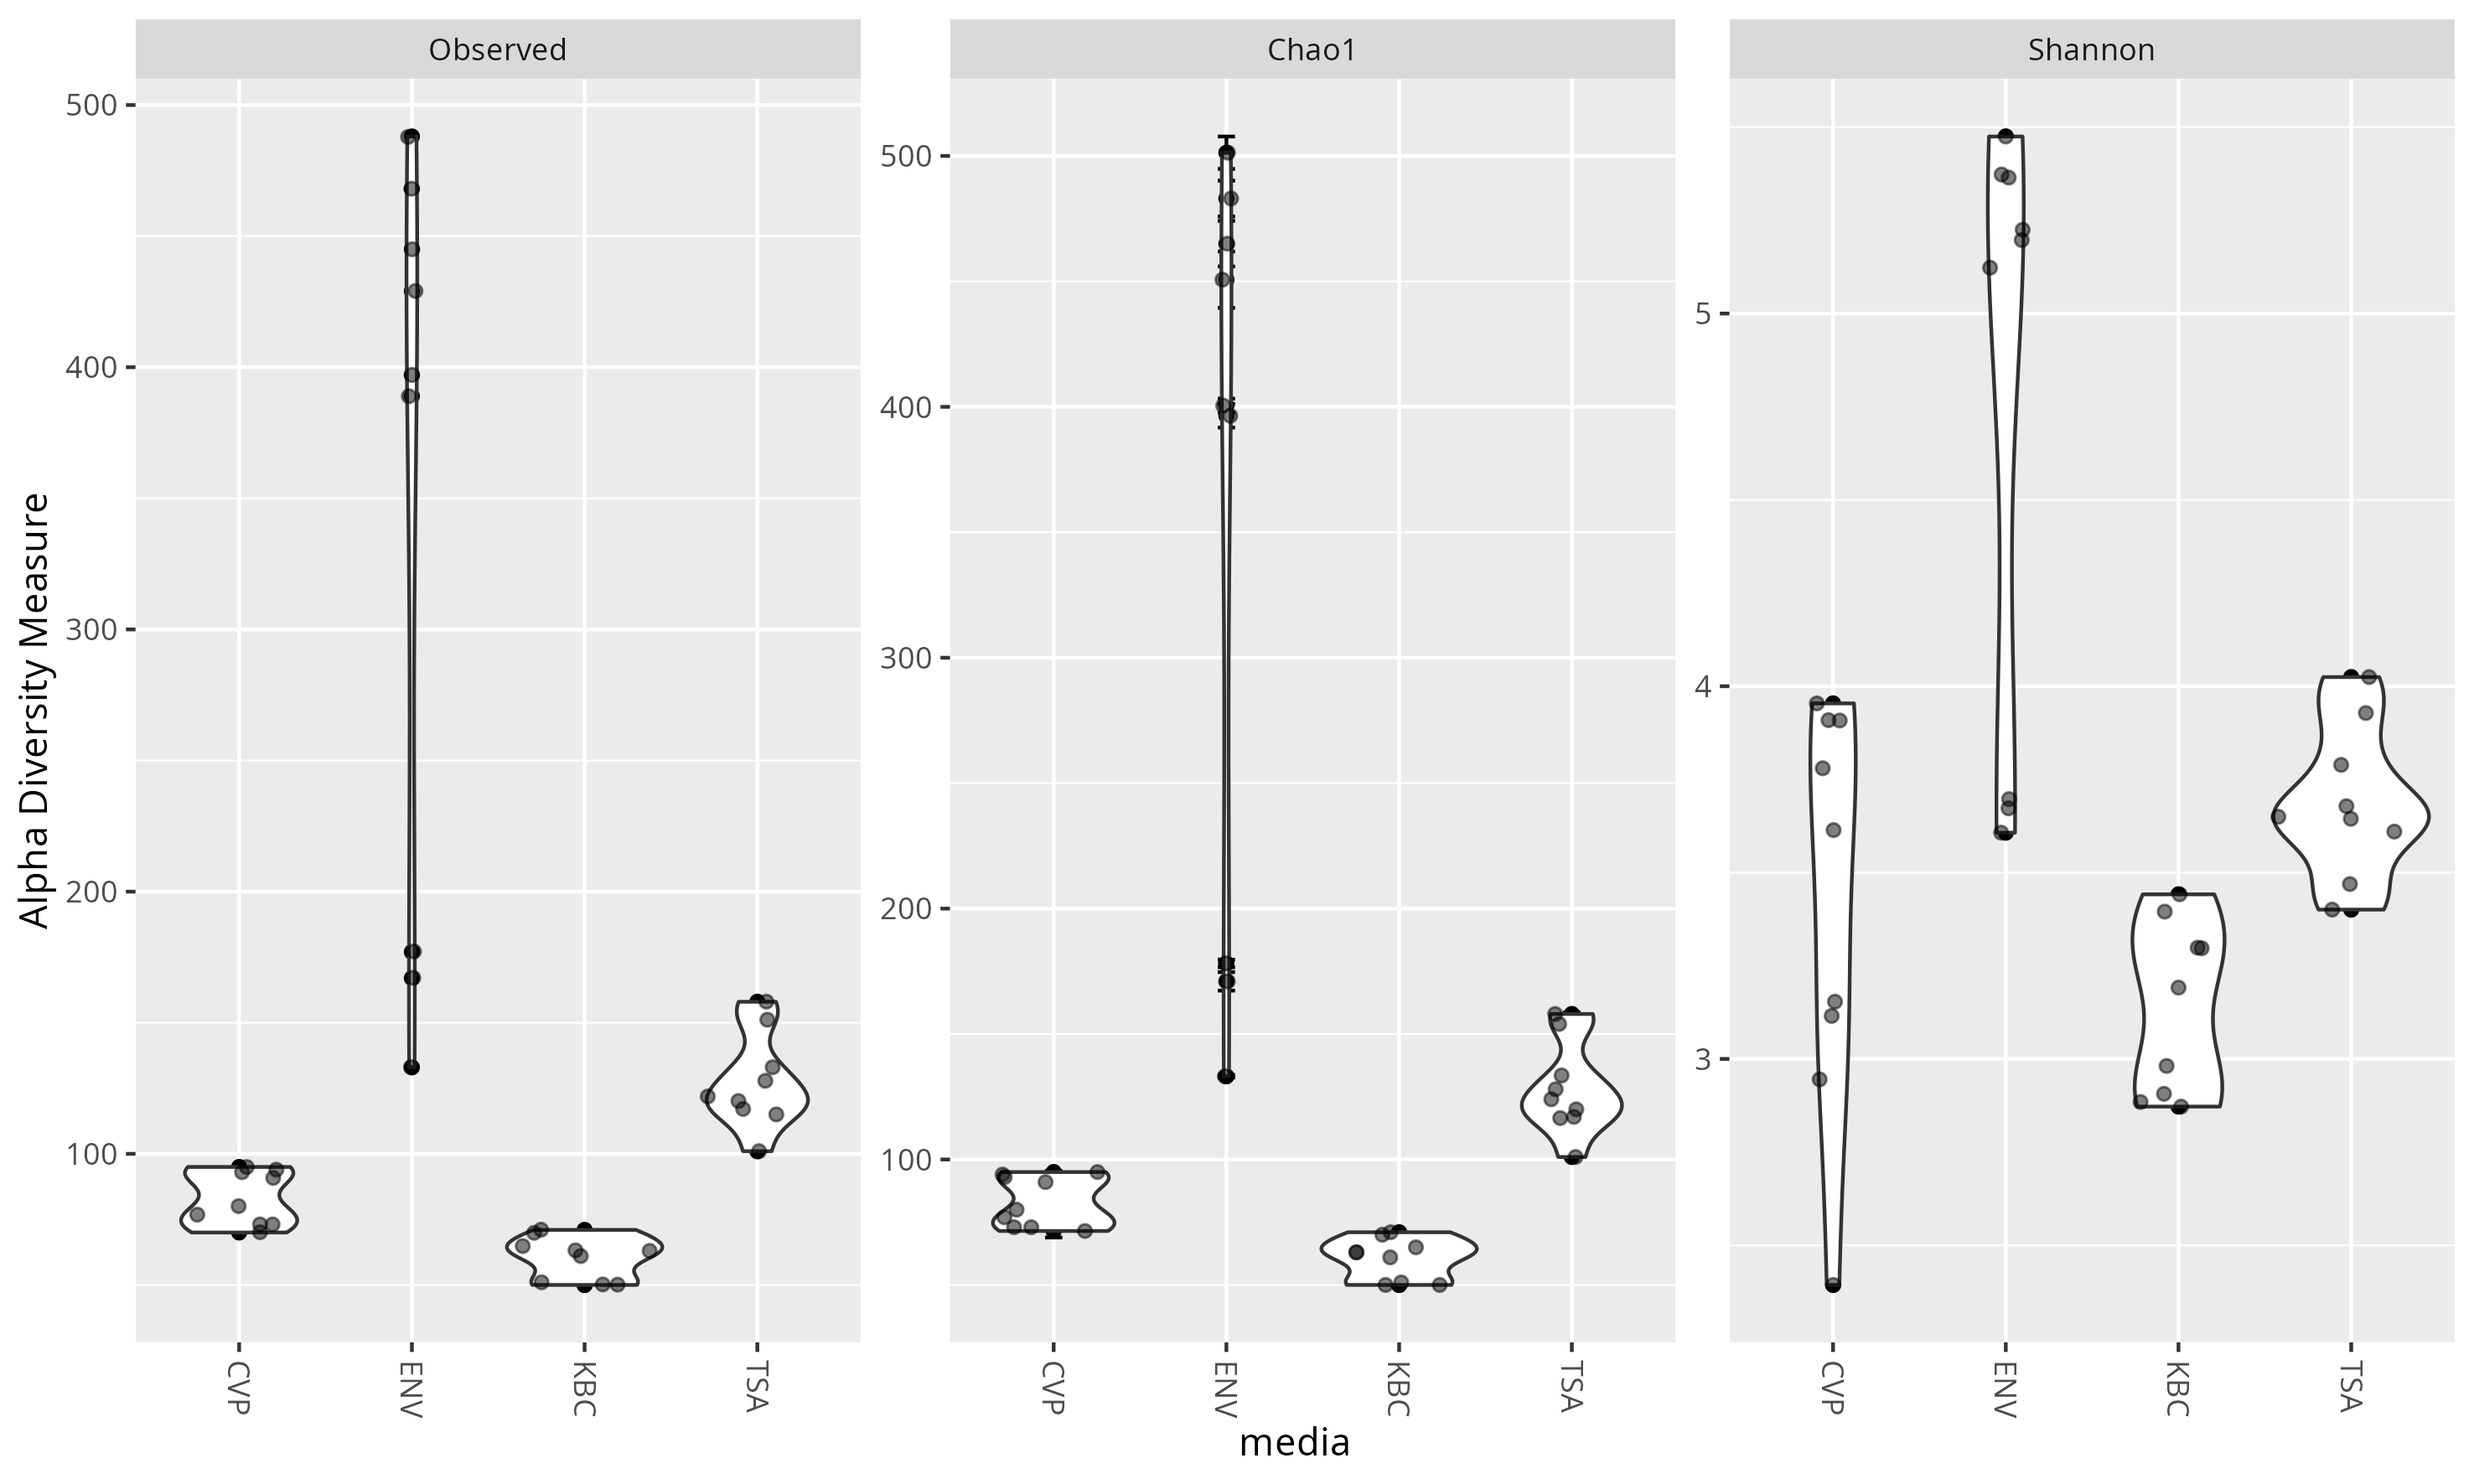

In [9]:
#Produce ggplot object of violin plot
alpha_violinplot <- phyloseq::plot_richness(physeq = pseq_rarefy,
                        x = "media",
                        measures = c("Observed","Chao1","Shannon")) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5)
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_media_violinplot.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_media_violinplot.png")

## Alpha site plots and stats

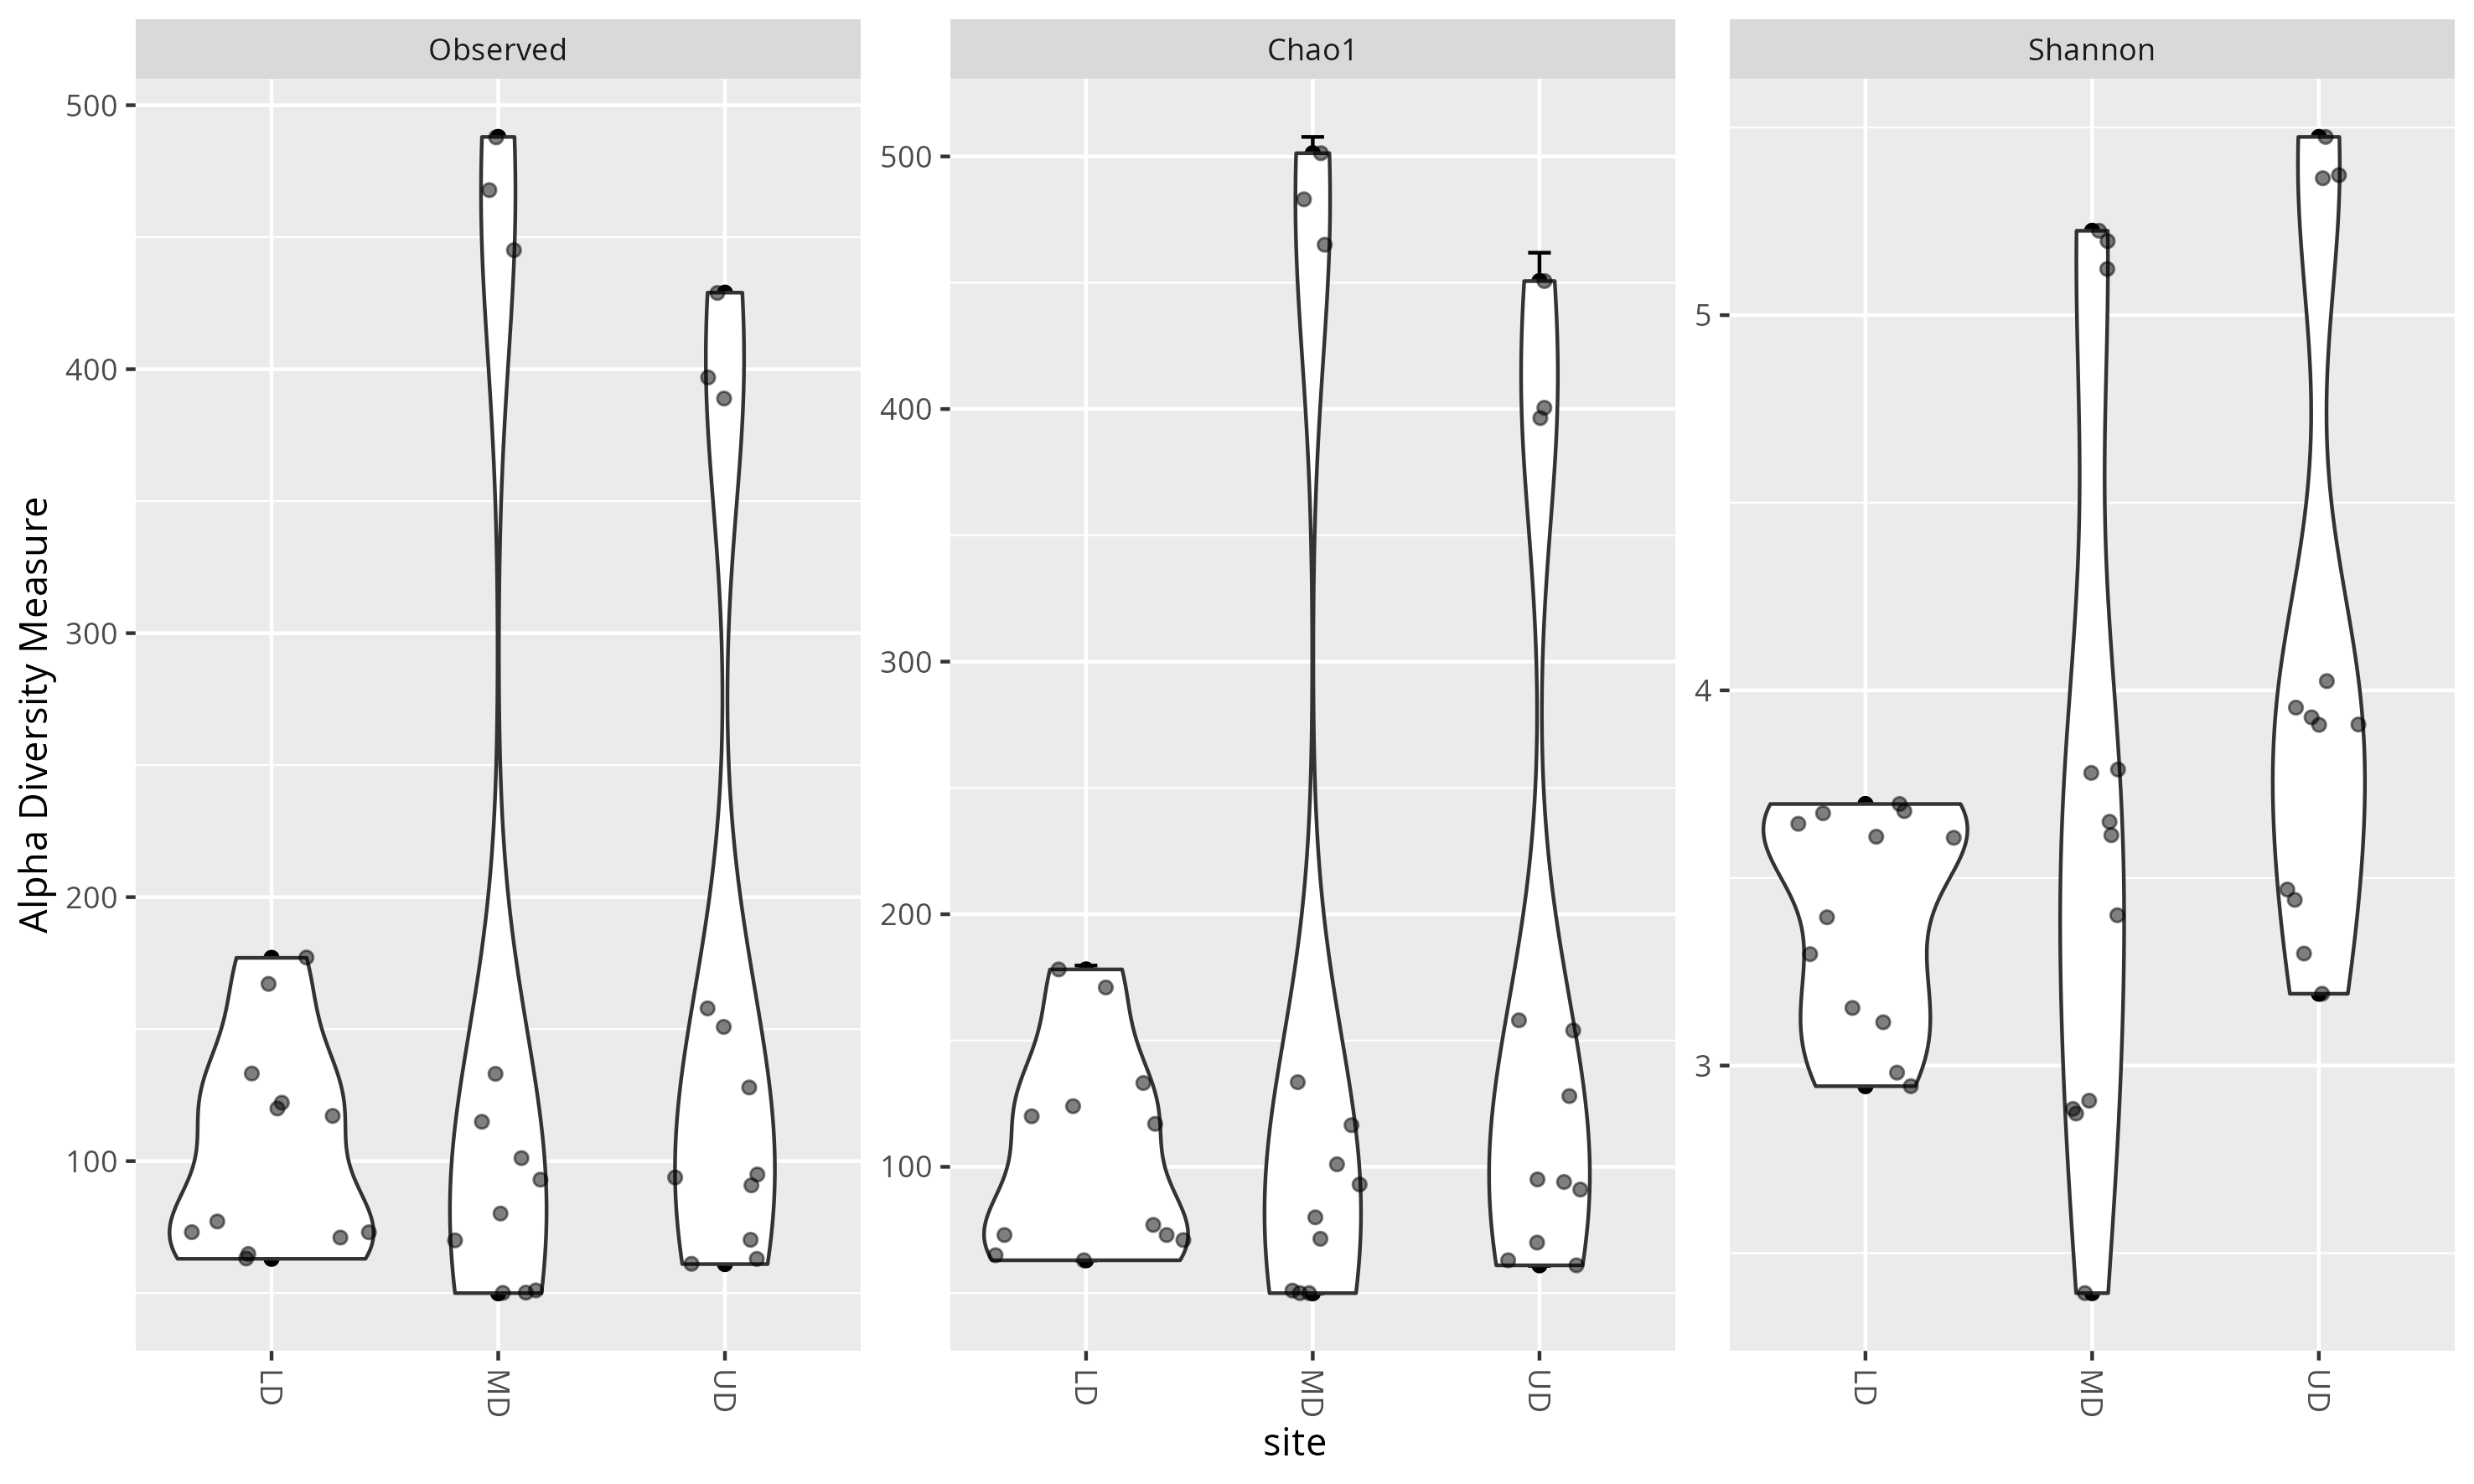

In [10]:
#Produce ggplot object of violin plot
alpha_violinplot <- phyloseq::plot_richness(physeq = pseq_rarefy,
                        x = "site",
                        measures = c("Observed","Chao1","Shannon")) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5)
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_site_violinplot.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_site_violinplot.png")

In [11]:
#Paired wilcoxon test
#Observed
pairwise.wilcox.test(alpha_df$Observed, phyloseq::sample_data(pseq_rarefy)$site)
#Chao1
pairwise.wilcox.test(alpha_df$Chao1, phyloseq::sample_data(pseq_rarefy)$site)
#Shannon
pairwise.wilcox.test(alpha_df$Shannon, phyloseq::sample_data(pseq_rarefy)$site)

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  alpha_df$Observed and phyloseq::sample_data(pseq_rarefy)$site 

   LD MD
MD 1  - 
UD 1  1 

P value adjustment method: holm 

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  alpha_df$Chao1 and phyloseq::sample_data(pseq_rarefy)$site 

   LD MD
MD 1  - 
UD 1  1 

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  alpha_df$Shannon and phyloseq::sample_data(pseq_rarefy)$site 

   LD    MD   
MD 0.551 -    
UD 0.025 0.255

P value adjustment method: holm 

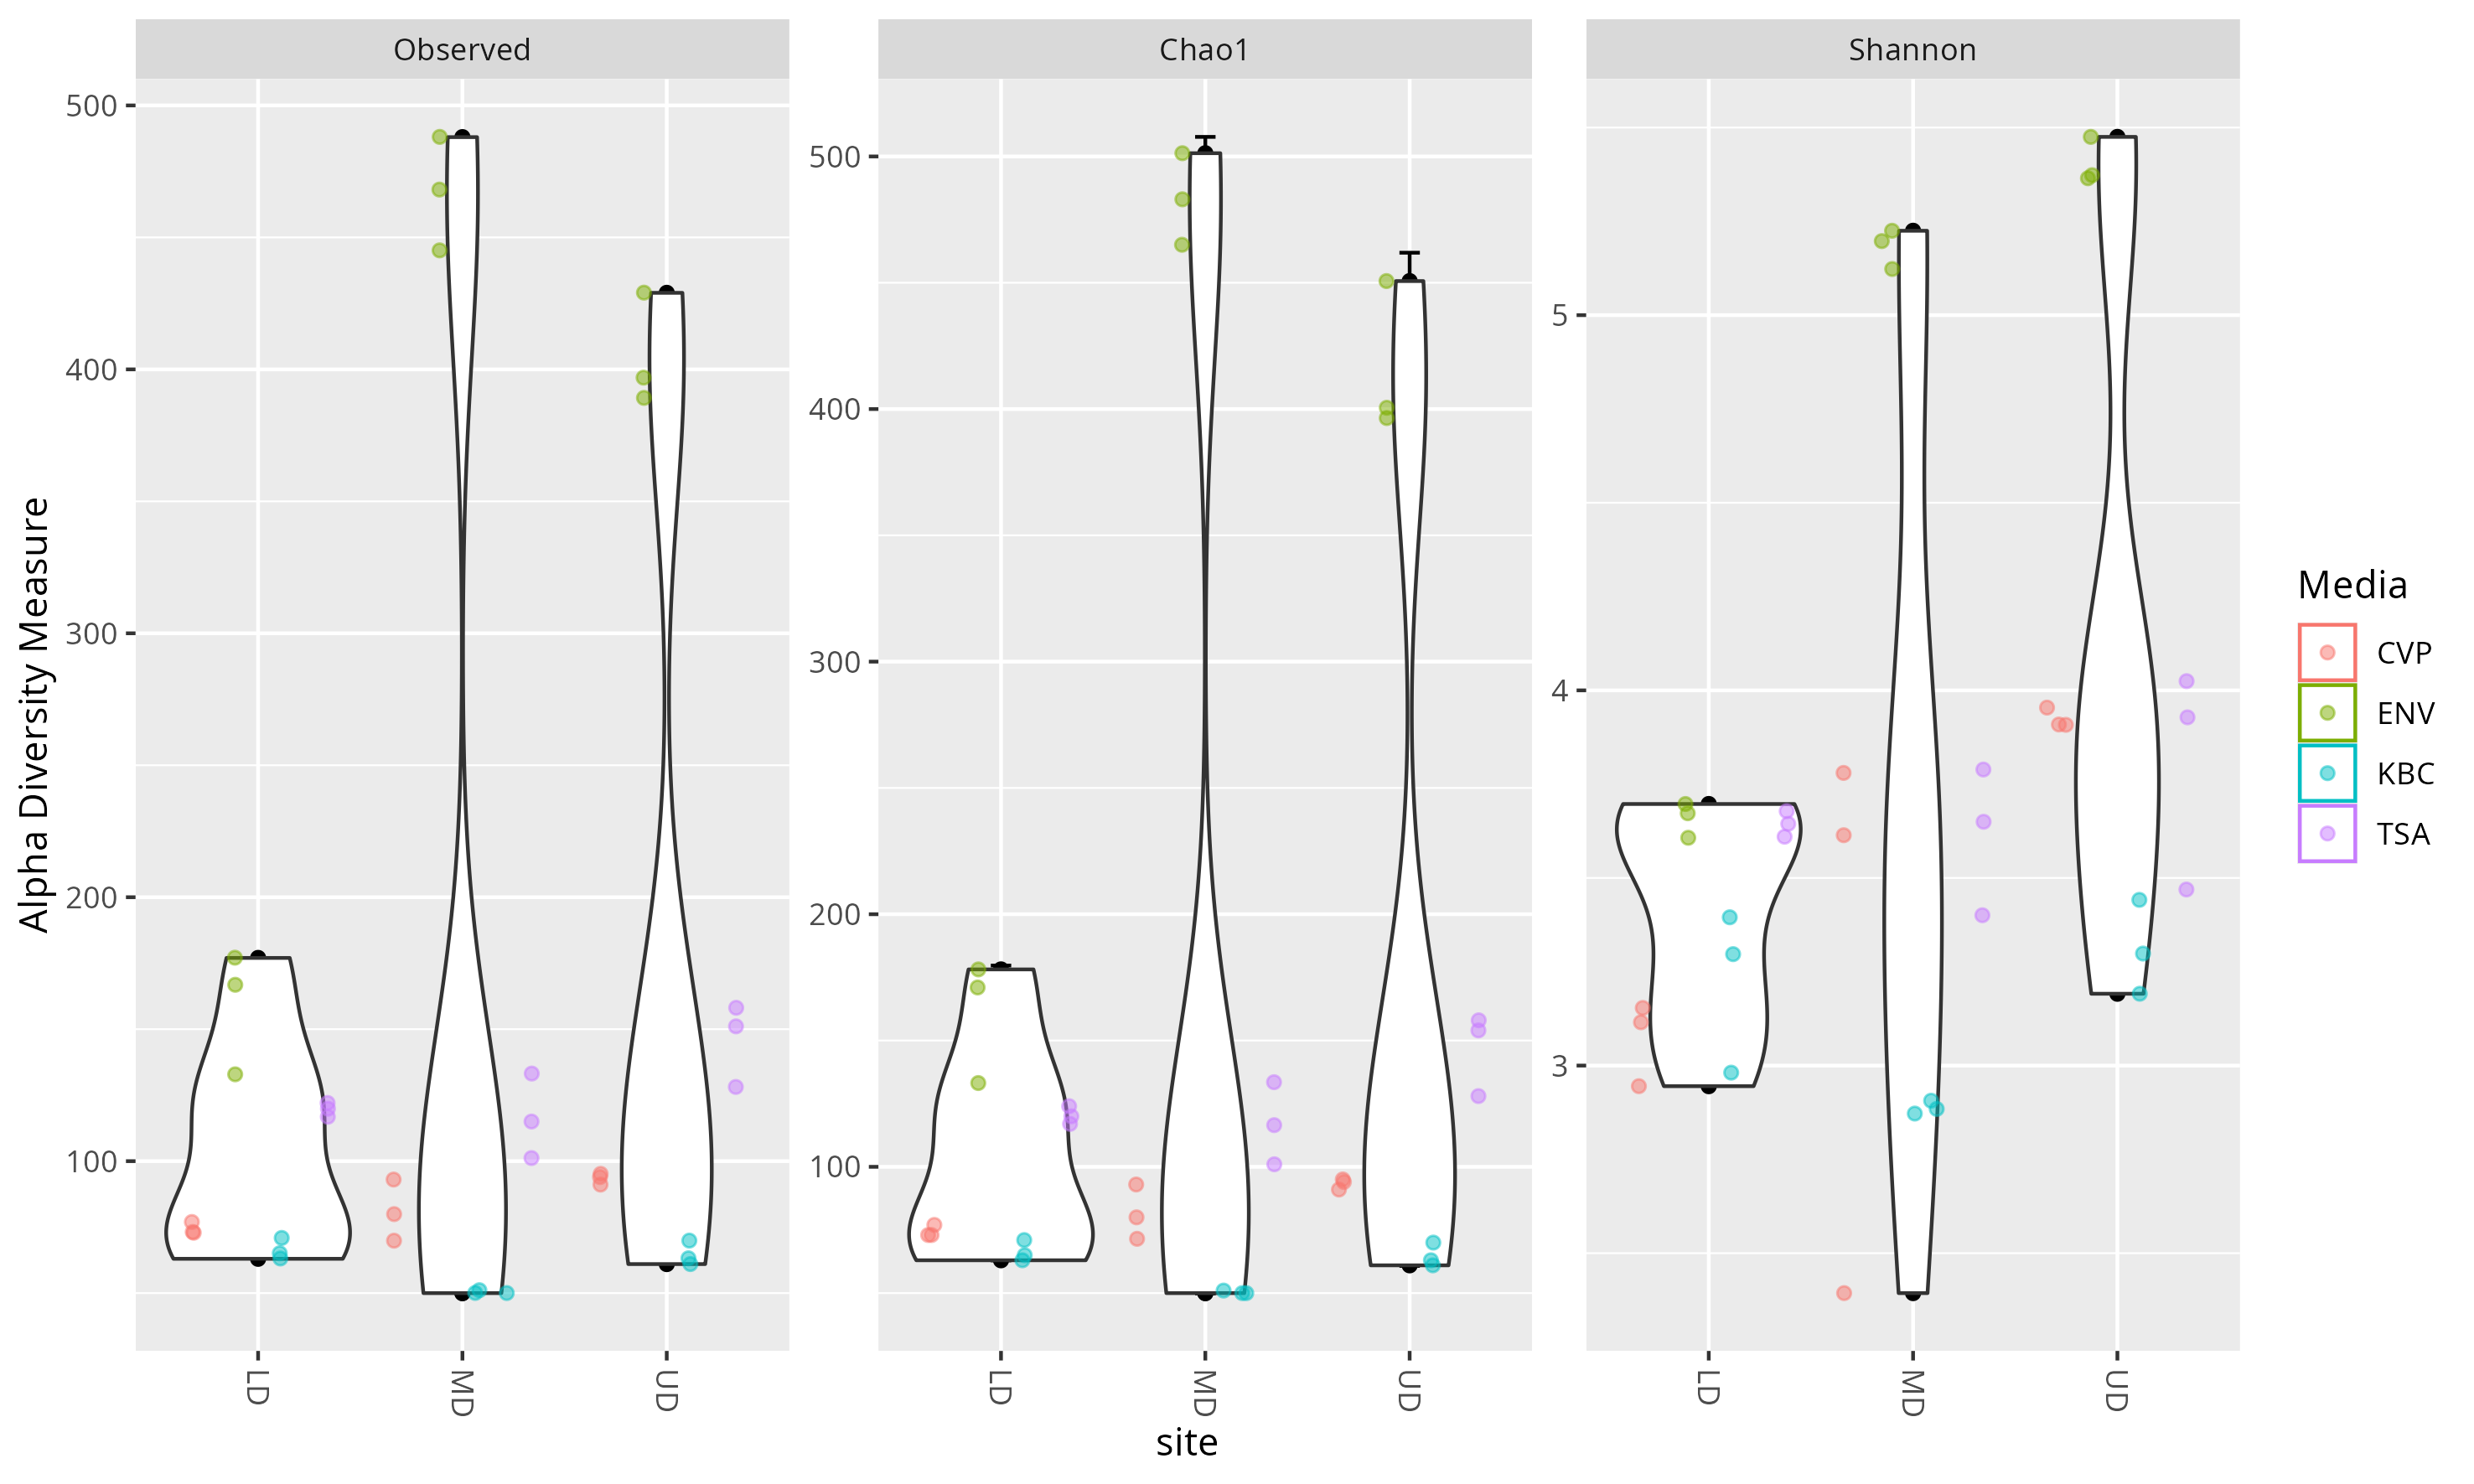

In [12]:
#Produce ggplot object of violin plot
alpha_violinplot <- phyloseq::plot_richness(physeq = pseq_rarefy,
                        x = "site",
                        measures = c("Observed","Chao1","Shannon")) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5, aes(colour=media)) +
                            ggplot2::labs(colour = "Media")
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_site_violinplot.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_site_violinplot.png")